<a href="https://colab.research.google.com/github/codicathelete/DL_codebasics/blob/main/image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 39kB/s 
     |████████████████████████████████| 4.0MB 41.0MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
     |████████████████████████████████| 4.0MB 42.7MB/s 
     |████████████████████████████████| 471kB 29.9MB/s 
     |████████████████████████████████| 6.0MB 38.6MB/s 
     |████████████████████████████████| 4.9MB 44.3MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: h5py 2

In [2]:
!nvidia-smi

Tue May 18 10:57:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def plt_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[index])

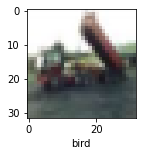

In [10]:
plt_sample(X_train, y_train, 2)

In [11]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [12]:
X_train= X_train/255
X_test = X_test/255

In [13]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation ='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.8096 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6205 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5407 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4828 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4308 - accuracy: 0.4977


In [18]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4808 - accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1394 - accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9952 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9125 - accuracy: 0.6830
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8503 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7988 - accuracy: 0.7234
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7556 - accuracy: 0.7369
Epoch 8/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7156 - accuracy: 0.7518
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6772 - accuracy: 0.7640
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [19]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9033 - accuracy: 0.7030


[0.9032750725746155, 0.703000009059906]

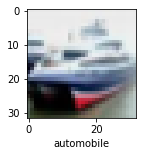

In [21]:
y_test=y_test.reshape(-1,)
plt_sample(X_test, y_test, 1)

In [23]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[6.7362533e-04, 7.8708144e-06, 2.8901285e-04, 7.8607374e-01,
        5.5924268e-04, 2.1011633e-01, 2.4010375e-04, 4.5742781e-04,
        1.5607574e-03, 2.1935050e-05],
       [6.4292811e-03, 8.1766462e-03, 1.5312507e-05, 5.4428500e-07,
        6.9409310e-08, 1.3976761e-08, 6.1830427e-08, 1.3853712e-07,
        9.8521686e-01, 1.6114950e-04],
       [1.3156541e-01, 2.8888023e-02, 3.2560856e-03, 4.5054145e-03,
        6.9400016e-04, 2.4251011e-03, 4.7007954e-05, 3.6353048e-02,
        7.8309137e-01, 9.1744894e-03],
       [7.8094351e-01, 2.0250816e-02, 4.5405377e-02, 1.1480034e-02,
        2.9466737e-02, 3.9447117e-05, 6.6158456e-05, 1.3884207e-02,
        9.7413667e-02, 1.0499991e-03],
       [9.0411131e-06, 4.0742266e-03, 1.5497159e-02, 9.1404893e-02,
        6.0744715e-01, 2.2087121e-02, 2.5926605e-01, 8.3277650e-05,
        6.3782907e-05, 6.7215187e-05]], dtype=float32)

In [24]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [28]:
print('Classification report :', classification_report(y_test, y_classes))

Classification report :               precision    recall  f1-score   support

           0       0.78      0.71      0.74      1000
           1       0.80      0.80      0.80      1000
           2       0.62      0.62      0.62      1000
           3       0.57      0.46      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.54      0.65      0.59      1000
           6       0.74      0.82      0.78      1000
           7       0.75      0.76      0.75      1000
           8       0.79      0.80      0.80      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

